# Imports and Constants

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import trimetkey as tmk

# Incorporated citipy to determine city based on latitude and longitude

# Output File (CSV)
output_data_file = "output_data/cities.csv"


Setup URL

In [2]:
" appID="
KEY= 'appID=' + tmk
url = "http://developer.trimet.org/ws/v2/vehicles?"
query_url = url + KEY+ "&ids=109,111" + "&onRouteOnly=True" + "&onRouteOnly=True" #+ '&routes=190'
query_url = url + KEY #+ "&routes=12"
print (query_url)
response_json = requests.get(query_url).json()
#print(response_json)
qtime = response_json['resultSet']['vehicle'][0]['time']
qtime = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime(qtime/1000.))
print(qtime)

#print(json.dumps(response_json, indent=4, sort_keys=True))
#print (type(response_json['resultSet']['vehicle'][0]['inCongestion']))
#for each in response_json['resultSet']['vehicle']:
#    if (each['inCongestion'] == True):
#        print ("True")

http://developer.trimet.org/ws/v2/vehicles?appID=DAD516A485E0B5E287769142D
04/21/2020 17:35:07


In [3]:
buses_only = []
buses_only_json = {}
for (v) in response_json["resultSet"]["vehicle"]:
    #print("Value: " + str(v))
    if(v["type"] == "bus"):
        buses_only.append(v)
buses_only_json["buses"] = buses_only
print(buses_only_json)

{'buses': [{'expires': 1587515946799, 'signMessage': '14 To 94-Foster', 'serviceDate': 1587452400000, 'loadPercentage': None, 'latitude': 45.4974377, 'nextStopSeq': 28, 'source': 'vm', 'type': 'bus', 'blockID': 1413, 'signMessageLong': '14  Hawthorne to 94th & Foster', 'lastLocID': 7666, 'nextLocID': 1792, 'locationInScheduleDay': 63477, 'newTrip': False, 'longitude': -122.6113511, 'direction': 0, 'inCongestion': False, 'routeNumber': 14, 'bearing': 176, 'garage': 'CENTER', 'tripID': '9792408', 'delay': 171, 'extraBlockID': None, 'messageCode': 266, 'lastStopSeq': 27, 'vehicleID': 3101, 'time': 1587515707584, 'offRoute': False}, {'expires': 1587515957769, 'signMessage': '11 To St Johns', 'serviceDate': 1587452400000, 'loadPercentage': None, 'latitude': 45.593154, 'nextStopSeq': 36, 'source': 'vm', 'type': 'bus', 'blockID': 1104, 'signMessageLong': '11  Rivergate/Marine Dr to St Johns', 'lastLocID': 5375, 'nextLocID': 13876, 'locationInScheduleDay': 63463, 'newTrip': False, 'longitude':

In [4]:
import json
# responseData = json.loads(output)
with open('bus_response.json','w') as dataFile:    
    json.dump(buses_only_json, dataFile, indent=4) 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [5]:
temps = composite_df["Max Temp"]
lats = composite_df["Lat"]

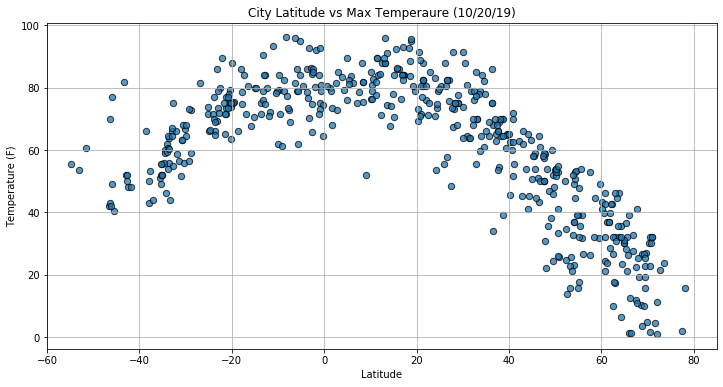

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(lats, temps, marker="o", facecolors="tab:blue", edgecolors="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"City Latitude vs Max Temperaure ({data_date})")
plt.xlim(-60, 85)
#plt.ylim(-10, 110)
plt.grid()
plt.savefig('output_data/CityLatvsMaxTemperature.png')
plt.show()

#### Latitude vs. Humidity Plot

In [7]:
humidities = composite_df["Humidity"]
lats = composite_df["Lat"]

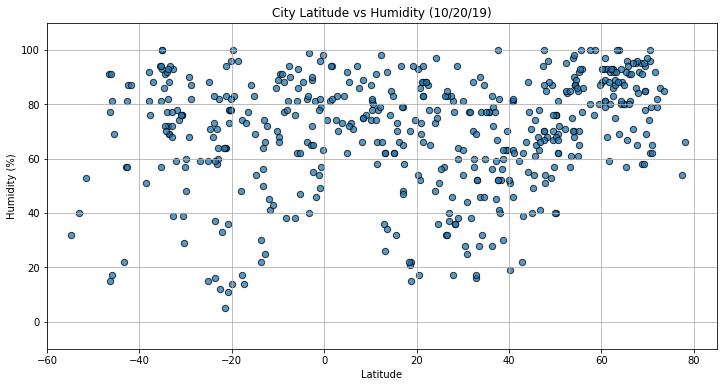

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(lats, humidities, marker="o", facecolors="tab:blue", edgecolors="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({data_date})")
plt.xlim(-60, 85)
plt.ylim(-10, 110)
plt.grid()
plt.savefig('output_data/CityLatvsHumidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

In [9]:
cloudiness = composite_df["Cloudiness"]
lats = composite_df["Lat"]

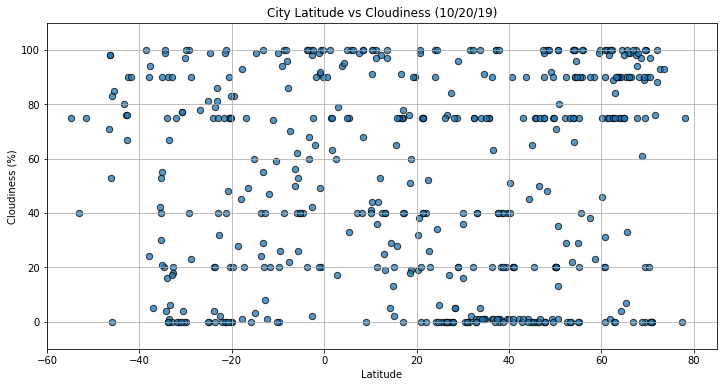

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(lats, cloudiness, marker="o", facecolors="tab:blue", edgecolors="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({data_date})")
plt.xlim(-60, 85)
plt.ylim(-10, 110)
plt.grid()
plt.savefig('output_data/CityLatvsCloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

In [11]:
windspeed = composite_df["Wind Speed"]
lats = composite_df["Lat"]

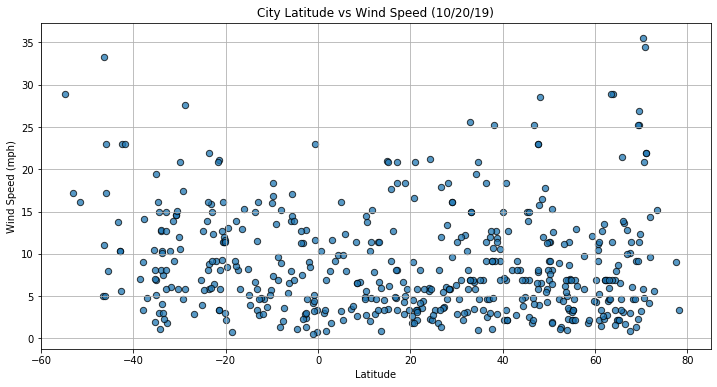

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(lats, windspeed, marker="o", facecolors="tab:blue", edgecolors="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({data_date})")
plt.xlim(-60, 85)
#plt.ylim(0, 100)
plt.grid()
plt.savefig('output_data/CityLatvsWindSpeed.png')
plt.show()

In [18]:
# Print out a little performance data on the data gathering.

print (f"City, Country locations generated: {len(cities)}.") 
print (f"Total calls to API: {success_counter + fail_counter}.")
print (f"Successful API calls: {success_counter}.")
print (f"Failed API calls: {fail_counter}.") 
delay_ave = "{:.2f}".format(np.mean(delaylist))
delay_ave = "{:.0f}".format(np.mean(delaylist) * 1000)
print (f"Average loop delay: {delay_ave} milliseconds.")
print (f"Cities sampled: {composite_df.shape[0]}.")

City, Country locations generated: 627.
Total calls to API: 575.
Successful API calls: 500.
Failed API calls: 75.
Average loop delay: 684 milliseconds.
Cities sampled: 500.
